# EDA Survey Data
---
Glenn Abastillas | 22 April, 2020

In [3]:
from glob import glob
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import re
import missingno

%matplotlib inline

---
### Load Data

In [4]:
survey_ = glob('../data/datasets/unicef/JMP*.csv')[0]
infrastructure_ = glob('../data/datasets/unicef/HCF*.csv')[0]
indicators_ = glob('../data/datasets/unicef/*indicators*.csv')[0]

In [5]:
survey = pd.read_csv(survey_)
infrastructure = pd.read_csv(infrastructure_)
indicators = pd.read_csv(indicators_)

---
### Check For Unique IDs

Examine `infrastructure` and `indicators` for `uid` candidates. `survey`will not be checked since it is a 'data dictionary' for the survey questions.

In [45]:
infra_n = infrastructure.shape[0]
indic_n = indicators.shape[0]

A column is a candidate to be a `uid` if it's unique values divided by row count is 100%.

In [59]:
for column in infrastructure:
    uniqueness = infrastructure[column].unique().size / infra_n
    
    if uniqueness == 1:
        print(f'{column:>30} {uniqueness:.2%}')

The `infrastructure` dataset does not appear to have a candidate key column.

In [60]:
for column in indicators:
    uniqueness = indicators[column].unique().size / indic_n
    if uniqueness == 1:
        print(f'{column[-30:]:>30} {uniqueness:.2%}')

                         rcode 100.00%


The `indicators` dataset can use the `rcode` column as a `uid`.

---

### Find Duplicate Columns

In [69]:
S1 = survey.iloc[:,0]
S2 = survey.iloc[:,1]

F = infrastructure.columns
D = indicators.columns

print(f'Number of duplicate columns according to survey dataset for `infrastructure`: {(F.isin(S1) & F.isin(S2)).sum()}')
print(f'Number of duplicate columns according to survey dataset for `indicators`: {(D.isin(S1) & D.isin(S2)).sum()}')

Number of duplicate columns according to survey dataset for `infrastructure`: 0
Number of duplicate columns according to survey dataset for `indicators`: 0


---
### Simple Plots

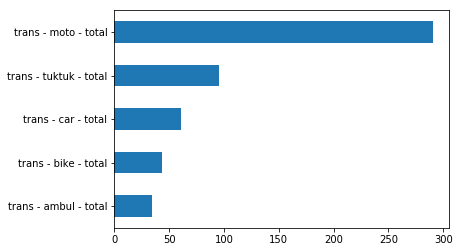

In [79]:
infrastructure.filter(regex='trans.*total').sum().sort_values().plot(kind='barh')

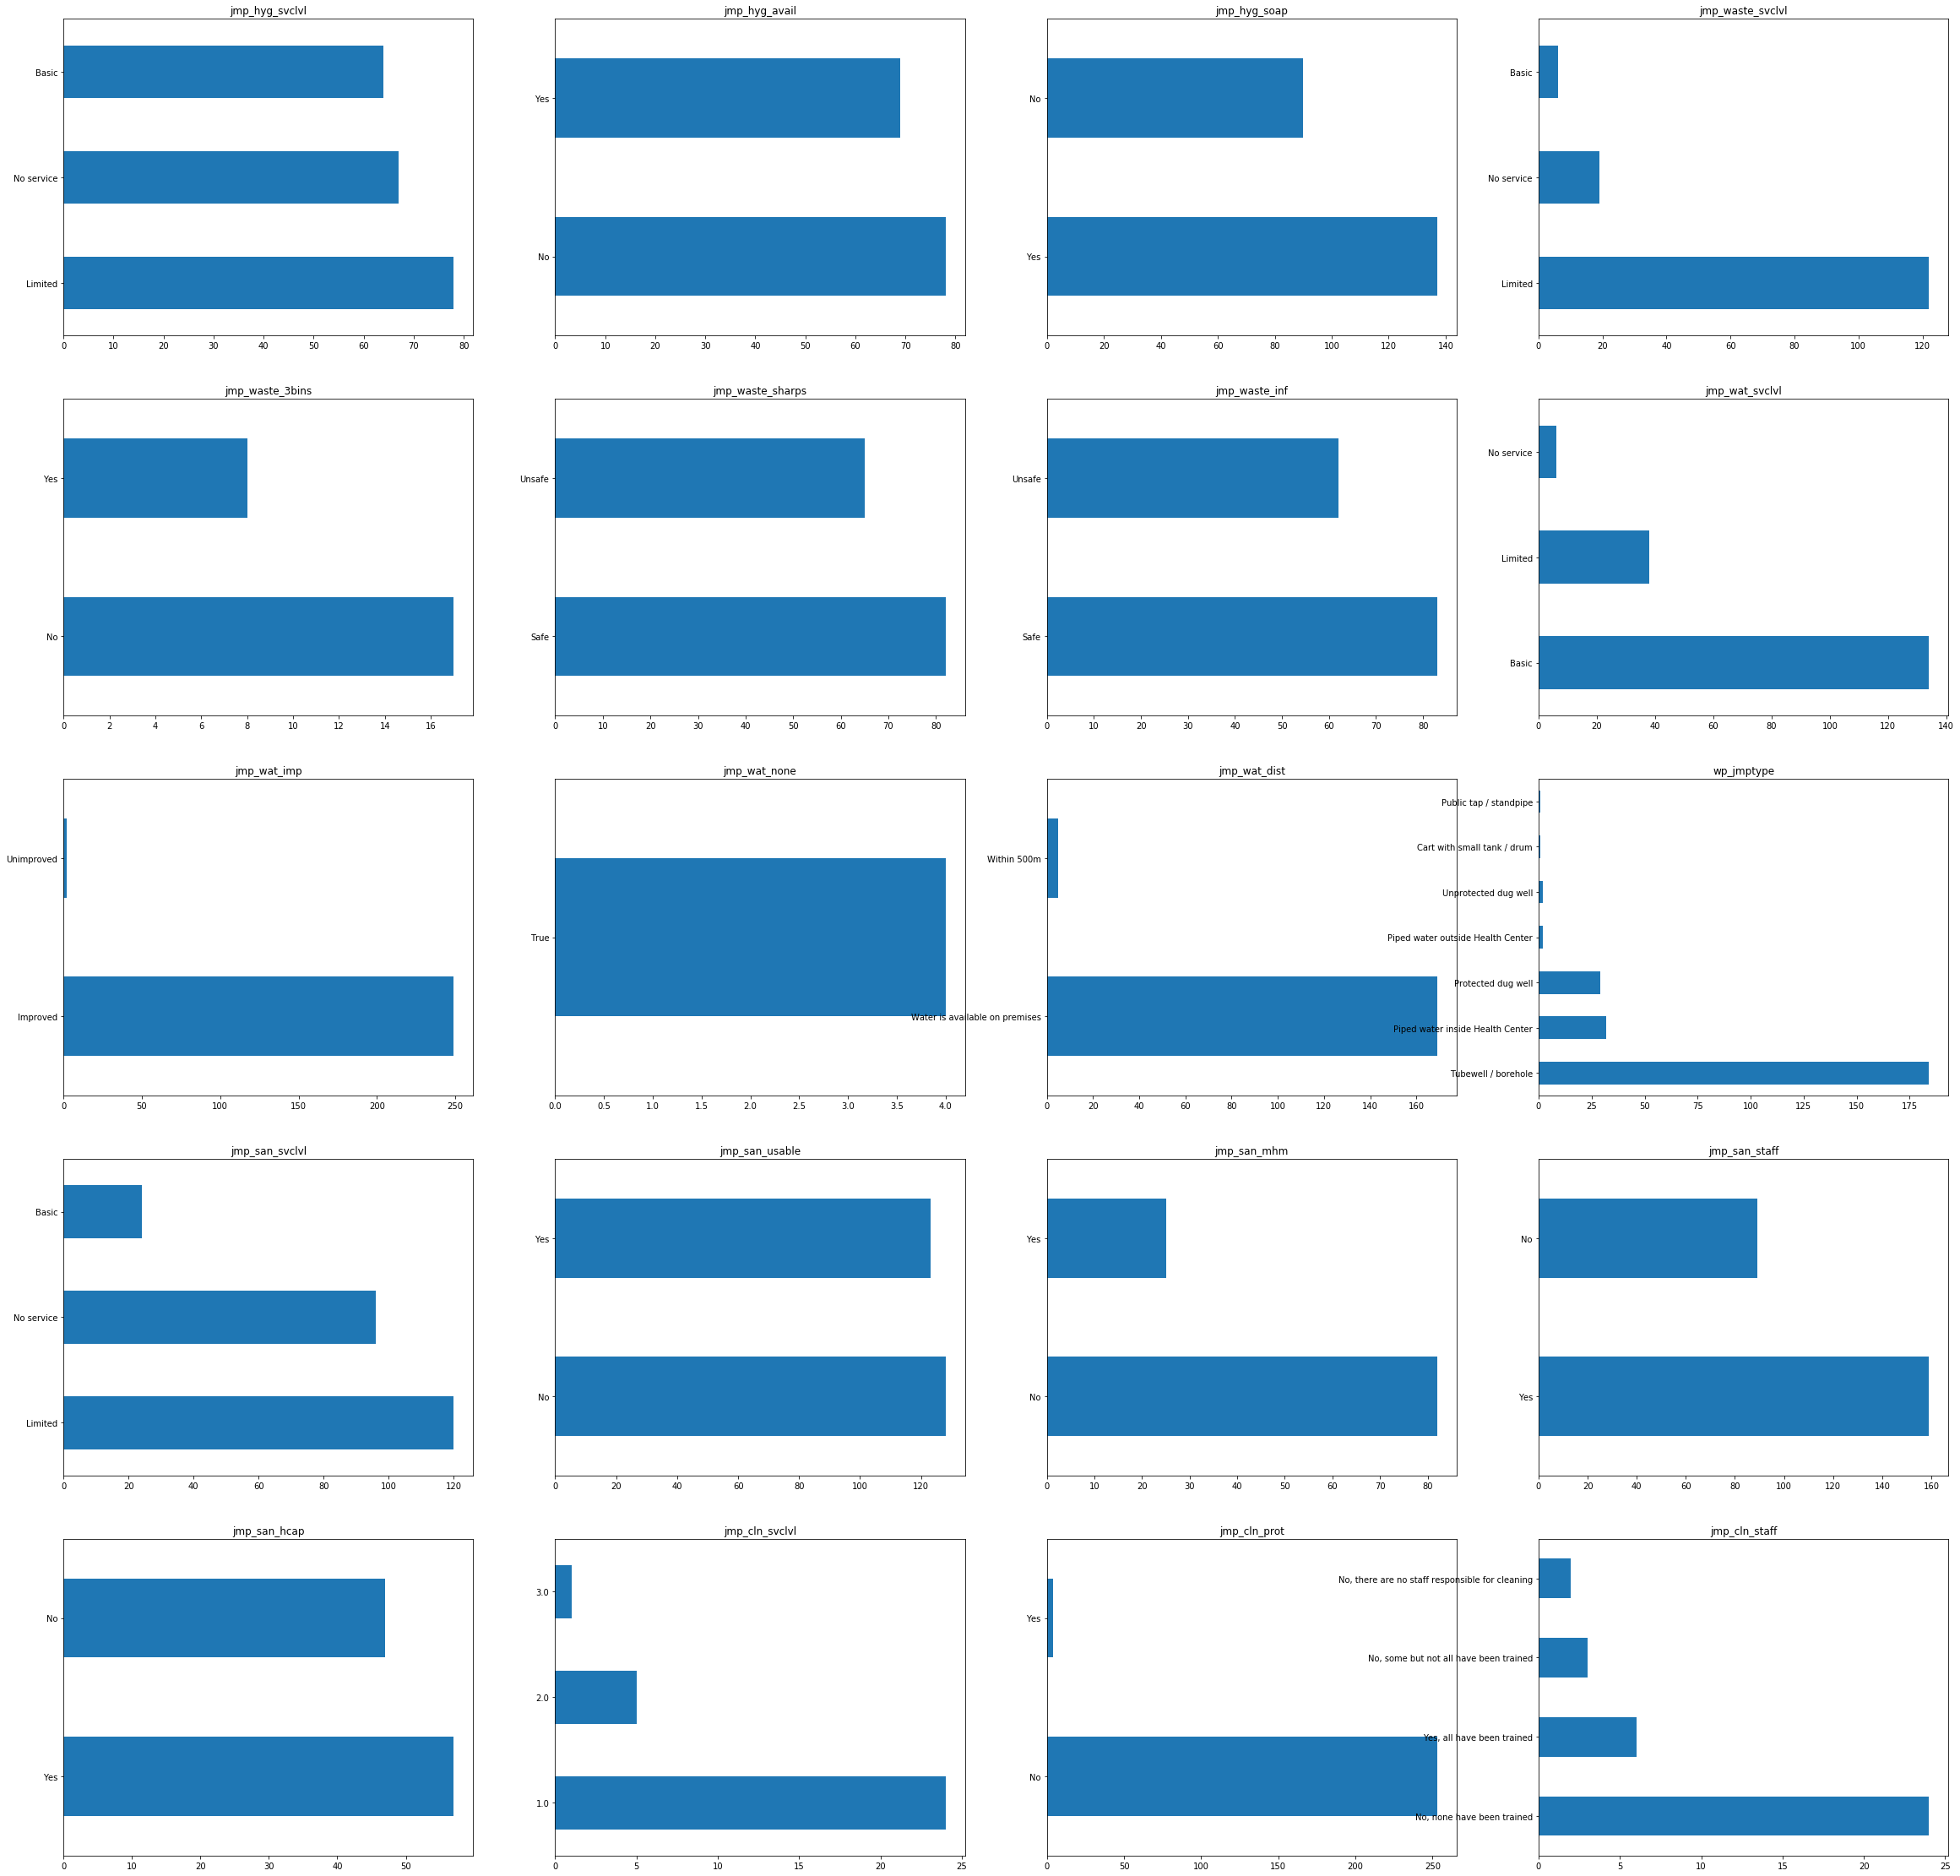

In [100]:
fig, axes = plt.subplots(5, 4, figsize=(40, 40))

I = indicators.filter(like='jmp')

for i, ax in enumerate(axes.flatten()):
    col = I.iloc[:, i].value_counts()
    col.plot(kind='barh', ax=ax, title=I.columns[i])

---
### Inspect Columns and Shape

In [6]:
survey.shape, infrastructure.shape, indicators.shape

((221, 2), (257, 126), (257, 127))

In [40]:
K = infrastructure.columns[~infrastructure.columns.isin(indicators.columns)]

infrastructure[K.tolist()[:10]]

,Deployment,Enumerator,Status,Response Code,Drafted On,Submitted On,Approval Level,IP Address,cds_mwaterid,cds_type
0,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6T99YZ,2020-03-16 12:14:17,2018-08-03 14:27:42,NaN,154.73.62.98,436009,Health Centre Type C
1,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6T99YZ,2020-03-16 12:14:17,2018-08-03 14:27:42,NaN,154.73.62.98,4704298,Health Centre Type A
2,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6T99YZ,2020-03-16 12:14:17,2018-08-03 14:27:42,NaN,154.73.62.98,4703297,Health Centre Type C
3,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6T99YZ,2020-03-16 12:14:17,2018-08-03 14:27:42,NaN,154.73.62.98,4703723,Health Centre Type C
4,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6T99YZ,2020-03-16 12:14:17,2018-08-03 14:27:42,NaN,154.73.62.98,4704243,Maternal/Child Health Clinic
...,...,...,...,...,...,...,...,...,...,...
252,Data Upload from old survey,kingsley.chris,Final,Isa.lopes7-83VFJ3,2020-03-16 12:14:17,2019-12-13 12:39:16,NaN,154.73.62.98,86688695,Health Centre Type B
253,Data Upload from old survey,kingsley.chris,Final,Isa.lopes7-82SHGX,2020-03-16 12:14:17,2019-12-20 10:17:28,NaN,154.73.62.98,4703967,Health Centre Type B
254,Data Upload from old survey,kingsley.chris,Final,Isa.lopes7-82SS8H,2020-03-16 12:14:17,2019-12-23 16:43:08,NaN,154.73.62.98,4703778,Health Centre Type B
255,Data Upload from old survey,kingsley.chris,Final,Isa.lopes7-82TC9G,2020-03-16 12:14:17,2019-12-23 17:30:31,NaN,154.73.62.98,4704054,Health Centre Type C


In [28]:
T = indicators.columns[~indicators.columns.isin(infrastructure.columns)]

(indicators[T[T.isin(survey.iloc[:,1])].tolist()].isna().sum() / 257).round(1).sort_values()

Is there an inicnerator at the center?                                                     0.0
How many consultation rooms have a handwashing basin?                                      0.0
Staffing of the health facility: Guards - Total number of staff                            0.1
Staffing of the health facility: Nurses - Total number of staff                            0.1
Staffing of the health facility: Service staff - Total number of staff                     0.1
Staffing of the health facility: Midwives - Total number of staff                          0.1
Staffing of the health facility: Lab technicians - Total number of staff                   0.1
How many consultation rooms have a handwashing basin that works?                           0.4
How many patient toilets are working?                                                      0.4
How many staff toilets are working?                                                        0.4
How many toilets of any kind are available exclusi

Unique title types

In [101]:
infrastructure.columns.sort_values().str.extract(r"(\w+)(\s|_)").loc[:,0].unique().tolist()

['Approval',
 nan,
 'Drafted',
 'IP',
 'Response',
 'Submitted',
 'cds',
 'cds_sanarea',
 'cond',
 'const',
 'const_year',
 'contact',
 'energy_light',
 'energy',
 'energy_source',
 'infra',
 'rehab',
 'roof',
 'roof_type',
 'room',
 'solar',
 'staffres',
 'staffres_cond',
 'survey',
 'trans']

In [103]:
indicators.columns.sort_values().str.extract(r"(\w+)(\s|_)").loc[:,0].unique().tolist()

['Are',
 'Community',
 'Functional',
 'Handwashing',
 'Have',
 'Health',
 'Healthcare',
 'How',
 'Hygiene',
 'Is',
 'Please',
 'Sanitation',
 'Sharps',
 'Staffing',
 'area',
 'area_san',
 'cont1',
 'cont2',
 nan,
 'handw_today',
 'hcf',
 'jmp_cln',
 'jmp_hyg',
 'jmp_san',
 'jmp_waste',
 'jmp_wat',
 'reg',
 'staff_docs',
 'submitted',
 'survey',
 'toilet',
 'waste',
 'water_available',
 'watsys',
 'watsys_tank',
 'watsys_taps',
 'wp']

---

### Examine Datatypes and Missing Data

##### Survey Data

This dataset is a dictionary/mapping of variables in the main data to user-readable labels.

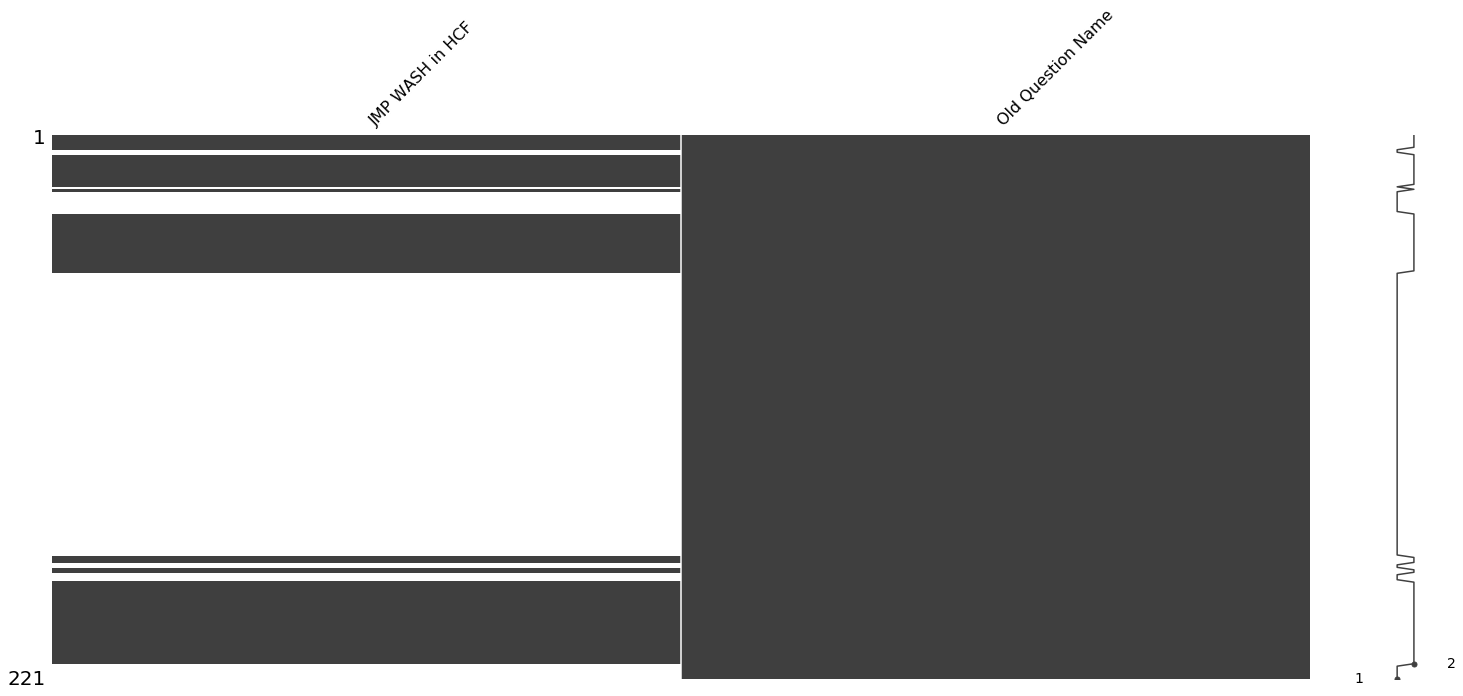

In [74]:
current = survey

missing = current.isna().sum()
missing, missing_shape, current_shape = missing[missing != 0], missing[missing != 0].shape, current.shape

columns = current.columns

sample = current.sample(10)

missingno.matrix(current)

In [ ]:
current['JMP WASH in HCF'].unique().tolist()

---

##### Infrastructure Data

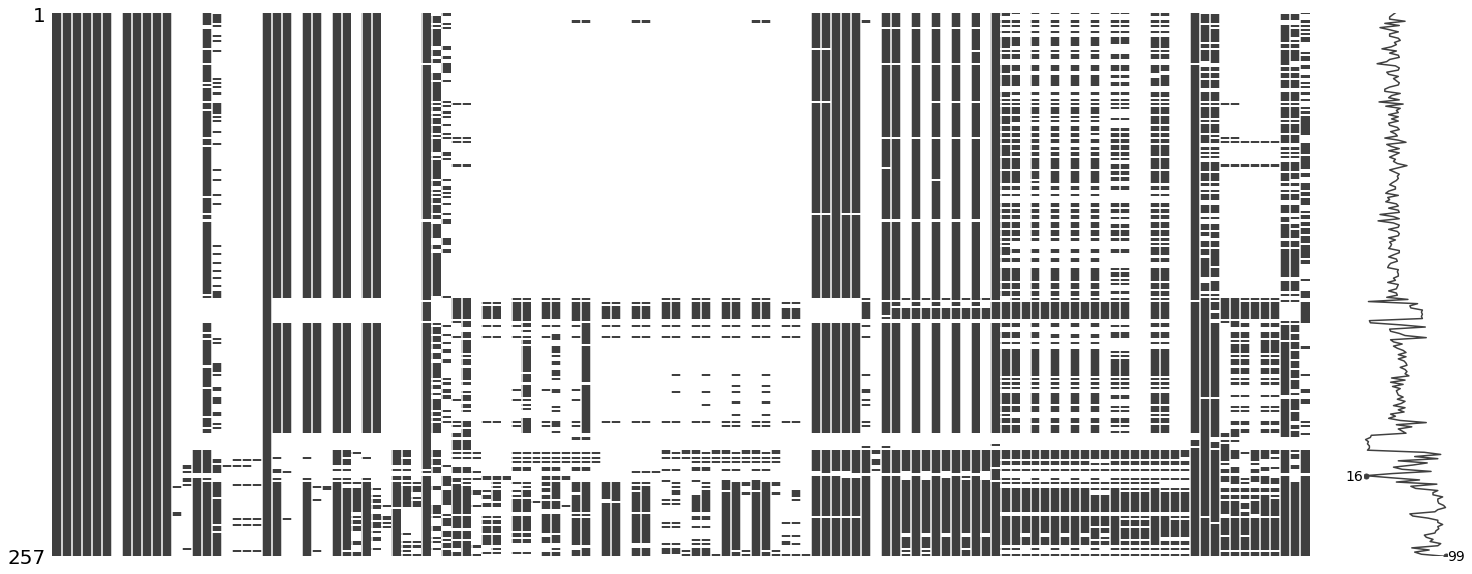

In [43]:
current = infrastructure

missing = current.isna().sum()
missing, missing_shape, current_shape = missing[missing != 0], missing[missing != 0].shape, current.shape

columns = current.columns

sample = current.sample(10)

missingno.matrix(current)

Some columns only have numeric data

In [44]:
current.filter(like='trans').describe()

,trans - bike - total,trans - bike - func,trans - bike - project,trans - car - total,trans - car - func,trans - moto - total,trans - moto - func,trans - tuktuk - total,trans - tuktuk - func,trans - ambul - total,trans - ambul - func
count,226.000000,189.000000,0.0,224.000000,190.000000,231.000000,227.000000,224.000000,203.000000,44.000000,25.000000
mean,0.190265,0.169312,NaN,0.272321,0.189474,1.259740,0.854626,0.424107,0.384236,0.772727,0.640000
std,0.662717,0.694132,NaN,0.722441,0.510104,1.043438,0.753172,0.538682,0.526663,0.831464,0.568624
min,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,NaN,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,NaN,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,5.000000,NaN,4.000000,4.000000,8.000000,4.000000,2.000000,2.000000,3.000000,2.000000


In [80]:
current.dtypes[current.dtypes == 'object'].index.tolist()

['Deployment',
 'Enumerator',
 'Status',
 'Response Code',
 'Drafted On',
 'Submitted On',
 'IP Address',
 'cds_type',
 'cds_sanreg',
 'cds_sanarea',
 'cds_sanarea (other) - specify',
 'contact - 1 - name',
 'contact - 1 - title',
 'contact - 2 - name',
 'contact - 2 - title',
 'survey_date',
 'trans - car - project',
 'trans - moto - project',
 'trans - tuktuk - project',
 'trans - ambul - project',
 'generalstate',
 "const_year (Don't Know)",
 'rehab - elec - year',
 'rehab - elec - org',
 'rehab - elec - org_other',
 'rehab - bhole - year',
 'rehab - bhole - org',
 'rehab - bhole - org_other',
 'rehab - pump - year',
 'rehab - pump - org',
 'rehab - pump - org_other',
 'rehab - wtank - year',
 'rehab - wtank - org',
 'rehab - wtank - org_other',
 'rehab - wsystem - year',
 'rehab - wsystem - org',
 'rehab - wsystem - org_other',
 'rehab - incin - year',
 'rehab - incin - org',
 'rehab - toilet - year',
 'rehab - toilet - org',
 'rehab - toilet - org_other',
 'rehab - struct - year',

In [36]:
current.sample(10)

,Deployment,Enumerator,Status,Response Code,Drafted On,Submitted On,Approval Level,IP Address,cds_mwaterid,cds_type,...,energy_source_backup,solar - panel - installed,solar - panel - num,solar - panel - cap,solar - batt - installed,solar - batt - num,solar - batt - cap,energy_light_total,energy_light_func,infra_pics
33,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6T99YZ,2020-03-16 12:14:17,2018-08-03 14:27:42,NaN,154.73.62.98,4703967,Health Centre Type C,...,None,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20.0,https://api.mwater.co/v3/images/be104f4d72b044...
233,Data Upload from old survey,kingsley.chris,Final,Isa.lopes7-83FPRG,2020-03-16 12:14:17,2019-12-04 13:29:07,NaN,154.73.62.98,436133,Health Centre Type B,...,None,2005-01-01,12.0,260.0,2019-01-01,4.0,250.0,17.0,15.0,https://api.mwater.co/v3/images/5c9d0d9e946b41...
99,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6T99YZ,2020-03-16 12:14:17,2018-08-03 14:27:42,NaN,154.73.62.98,4703833,Health Centre Type C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://api.mwater.co/v3/images/dbba8269fb534e...
2,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6T99YZ,2020-03-16 12:14:17,2018-08-03 14:27:42,NaN,154.73.62.98,4703297,Health Centre Type C,...,Solar,NaN,NaN,NaN,NaN,NaN,NaN,19.0,10.0,NaN
192,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6TLUPH,2020-03-16 12:14:17,2018-08-07 14:40:42,NaN,154.73.62.98,4703754,Health Centre Type C,...,None,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,NaN
228,Data Upload from old survey,kingsley.chris,Final,Isa.lopes7-83CTHU,2020-03-16 12:14:17,2019-12-03 10:58:20,NaN,154.73.62.98,4703369,Health Centre Type B,...,None,2017-01-01,6.0,260.0,2017-01-01,4.0,250.0,10.0,3.0,https://api.mwater.co/v3/images/bd04b99fd1c847...
139,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6TLBUZ,2020-03-16 12:14:17,2018-08-07 10:15:04,NaN,154.73.62.98,435943,Health Centre Type C,...,Solar,2018-01-01,4.0,250.0,2018-01-01,4.0,220.0,NaN,NaN,https://api.mwater.co/v3/images/4340aaaa86e543...
141,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6TLE2M,2020-03-16 12:14:17,2018-08-07 10:49:47,NaN,154.73.62.98,435967,Health Centre Type C,...,NaN,2018-01-01,4.0,220.0,2018-01-01,4.0,250.0,NaN,NaN,https://api.mwater.co/v3/images/e6425f7a65264f...
76,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6T99YZ,2020-03-16 12:14:17,2018-08-03 14:27:42,NaN,154.73.62.98,4703857,Health Centre Type C,...,None,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,https://api.mwater.co/v3/images/cd4baccf17f342...
77,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6T99YZ,2020-03-16 12:14:17,2018-08-03 14:27:42,NaN,154.73.62.98,4704126,Health Centre Type C,...,None,NaN,NaN,NaN,NaN,NaN,NaN,19.0,2.0,https://api.mwater.co/v3/images/e7c70309b71b4a...


---
##### Indicators Data

In [2]:
current = indicators

missing = current.isna().sum()
missing, missing_shape, current_shape = missing[missing != 0], missing[missing != 0].shape, current.shape

columns = current.columns

sample = current.sample(10)

missingno.matrix(current)

NameError: name 'indicators' is not defined

In [1]:
current.isna().sum / current.shape[0]

NameError: name 'current' is not defined

In [68]:
current.columns.tolist()

['jmp_hyg_svclvl',
 'jmp_hyg_avail',
 'jmp_hyg_soap',
 'jmp_waste_svclvl',
 'jmp_waste_3bins',
 'jmp_waste_sharps',
 'jmp_waste_inf',
 'jmp_wat_svclvl',
 'jmp_wat_imp',
 'jmp_wat_none',
 'jmp_wat_dist',
 'enum',
 'status',
 'rcode',
 'hcf_mwaterid',
 'hcf_type',
 'reg_san',
 'area_san',
 'area_san_other',
 'cont1_name',
 'cont1_title',
 'cont1_orng',
 'cont1_mtn',
 'cont2_name',
 'cont2_title',
 'cont2_orng',
 'cont2_mtn',
 'survey_date',
 'staff_docs_all',
 'Staffing of the health facility: Doctors - Number of male staff',
 'Staffing of the health facility: Doctors - Number of female staff',
 'Staffing of the health facility: Nurses - Total number of staff',
 'Staffing of the health facility: Nurses - Number of male staff',
 'Staffing of the health facility: Nurses - Number of female staff',
 'Staffing of the health facility: Midwives - Total number of staff',
 'Staffing of the health facility: Midwives - Number of male staff',
 'Staffing of the health facility: Midwives - Number of f

In [72]:
current.sample(3)

,jmp_hyg_svclvl,jmp_hyg_avail,jmp_hyg_soap,jmp_waste_svclvl,jmp_waste_3bins,jmp_waste_sharps,jmp_waste_inf,jmp_wat_svclvl,jmp_wat_imp,jmp_wat_none,...,jmp_san_mhm,jmp_san_staff,jmp_san_hcap,jmp_cln_svclvl,jmp_cln_prot,jmp_cln_staff,hcf_name,submitted_date,lat,lon
19,Basic,Yes,Yes,Limited,NaN,Safe,Safe,Limited,Improved,NaN,...,No,No,No,NaN,No,NaN,Caio,2018-08-03 14:27:42,11.93028,-16.20036
216,No service,No,No,No service,No,Safe,Safe,Limited,Improved,NaN,...,No,No,No,NaN,No,NaN,Jeta,2018-11-07 11:06:14,11.85698,-16.25470
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,Catio,2018-08-07 12:51:13,11.28435,-15.25556


In [7]:
data.sample(10)

NameError: name 'data' is not defined